# CSCI 3022 Homework
<figure>
  <IMG SRC="https://www.colorado.edu/cs/profiles/express/themes/cuspirit/logo.png" WIDTH=50 ALIGN="right">
</figure>

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below. 

In [1]:
NAME = "Alex Cullen"
COLLABORATORS = "None"

If you referenced any web sites or solutions not of your own creation, list those references here:

I did not use any external solutions, however, I did use:

numpy.org,
matplotlib.org,
pandas.pydata.org

which are the reference documentation sources for numpy, matplotlib and pandas respectively


I also used the lecture videos from this unit, specifically the "Basic Data Visualization Using Matplotlib" video

---

In [2]:
! pip install nose 
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats
import math

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip


# Question 1 - NumPy and Quantitative Descriptive Statistics

In this question, you will demonstrate basic skills in using Python NumPy to manipulate data. You will use NumPy to compute summary statistics (mean, variance, MAD). In addition, you will be asked to prove that variance can be computed efficiently.

You are given three datasets, named **mdata, ndata** and **odata** as numpy arrays.

In [3]:
mdata = np.array([-0.45291284,  0.74453572, -0.97287917, -0.86991267, -2.74940419,
       -0.66674299,  0.3529351 ,  0.91167899, -1.17912526, -1.22838732,
        0.25001612, -1.15477484,  1.67784362,  0.02791846, -2.32938304,
       -0.32312156,  1.89865861, -0.93543953, -0.14155349, -0.09179661])
ndata = np.array([14, 14, 11, 15, 13, 14, 14, 14, 15, 15, 14, 13, 13, 15, 12, 13, 14,
       12, 15, 13])
odata = np.array([ 0.67520521,  0.26067143,  3.52429452,  0.77962619,  0.19184713,
        0.17497214,  0.39691151,  0.40150936,  0.25971164,  0.38285948,
        3.78966047,  0.01862461,  2.64324599,  1.31770968,  1.4903489 ,
        1.50268875,  0.14001597,  1.15468168,  1.23531206,  2.2259339 ])

## 1.A - Compute the mean of mdata [5pts]

In the cell below, use basic NumPy operations to set variable `mdata_mean` to the sample mean of **mdata** using the definition from chapter 16 of MIPS. Because the goal of the question is to demonstrate proficiency in using NumPy, you should *not* use `np.mean` -- instead, you should perform the basic calculations yourself using *e.g.* `np.sum`. 

In [4]:
# your code here
mdata_mean = mdata.sum()/mdata.size
print(mdata_mean)

-0.3615923445


In [5]:
from nose.tools import assert_equal
assert_equal(mdata_mean, np.mean(mdata))

## 1.B - Compute the Variance of ndata [5pts]

In the cell below, use basic NumPy operations to set variable `ndata_var` to the sample variance of **ndata** using the definition from chapter 16 of MIPS. You should *not* use `np.var` or `np.mean` -- instead, you should perform the basic calculations yourself using *e.g.* `np.sum`.

In [6]:
# your code here
ndata_var =  ((ndata - ndata.sum()/ndata.size)**2).sum()/(ndata.size-1)
print(ndata_var)

1.2921052631578946


In [7]:
assert abs(ndata_var - np.var(ndata,ddof=1)) < 0.001

## 1.C - Compute the Mean Absolute Deviation of odata [5pts]

In the cell below, use basic NumPy operations to assign variable `odata_mad` the *median absolute deviation* (MAD) of **odata** using the definition from chapter 16 of MIPS. You should perform the basic calculations yourself using *e.g.* `np.abs` and you may use `np.percentile` to extract the median.

Note that the definition of MAD in the MIPS book is the *sample MAD*. Many references use the [MAD as a robust estimate of the standard deviation](https://en.wikipedia.org/wiki/Median_absolute_deviation). To relate the MAD to the standard deviation, a *constant scale factor* is used, depending on the (assumed) population distribution. In this problem, you're being asked to compute the raw sample MAD.

In [8]:
# your code here
odata_mad = np.median(np.abs(odata - np.percentile(odata, 50)))
print(odata_mad)

0.544006065


In [9]:
import statsmodels.robust.scale
assert abs(odata_mad - statsmodels.robust.scale.mad(odata,c=1)) < 0.001

## 1.D - Simplifying the computation of variance [ 10 pts ]

This is problem 16.15 from MIPS.

The following rule is useful for the computation of the sample variance (and standard deviation). Show that

$$ 1/n \sum_{i=1}^n \left( x_i - \bar x\right)^2 = \left( 1/n \sum_{i=1}^n x_i^2 \right) - (\bar x)^2 $$ where $\bar x = 1/n \sum_{i=1}^n x_i$

Prove $ 1/n \sum_{i=1}^{n} (x_i - \bar x)^2 = (1/n \sum_{i=1}^{n}x_{i}^2)-(\bar x)^2$

$ (x_i - \bar x)^2 = (x_{i} - \bar x)(x_{i} - \bar x) $

$                  = x_{i}^2 - 2 x_{i} \bar x + \bar x^2 $

$\frac{1}{n} \sum_{i=1}^{n} (x_i - \bar x)^2$

$= \frac{1}{n} \sum_{i=1}^{n} (x_i^2 - 2x_i\bar x + \bar x^2)$


$= \frac{1}{n} \sum_{i=1}^{n} x_i^2 - \frac{2}{n} \sum_{i=1}^{n} x_i \bar x + \frac{1}{n} \sum_{i=1}^{n} \bar x^2$



$= \frac{1}{n} \sum_{i=1}^{n} x_i^2 - 2\bar x \frac{1}{n} \sum_{i=1}^{n} x_i + \frac{1}{n} n\bar x^2$

$= \frac{1}{n} \sum_{i=1}^{n} x_i^2 - 2\bar x \bar x + \bar x^2$

$= \frac{1}{n} \sum_{i=1}^{n} x_i^2 - \bar x^2$

$  = -2 x_{i} 1/n \sum^{n}_{i=1}x_i +  (1/n \sum^{n}_{i=1}x_i)^2 $

Assume you are computing the variance and the MAD for many data samples. Given the relationship above, explain one motivation for the common use of computing and reporting the mean and variance compared to the more robust statistics such as median and MAD.

One motivation for using mean and variance compared to more robust statistics such as median and MAD, is that median and MAD required the data to be sorted prior to calculation. This means that in very large datasets of unordered data, calculating median and MAD maybe expensive both in Time and Memory. In contrast, the mean and variance do not required the data to be sorted beforehand and are therefore much cheaper and faster to compute. If you have a general sense about the data, and robustness is not the primary concern, then mean and variance can be more approrpriate choices for many data samples.  

## Problem 2 - Basic Pandas

In this problem, you're going to create a Pandas data frame using the **mdata, ndata** and **odata** from the first problem. You'll then compute some basic statistics using the data frame.

## Problem 2a - Create the dataframe df [5 pts]

Create a dataframe named `df` with three columns labeled `m`, `n` and `o`. Each column should have the data from the corresponding numpy vector.

In [10]:
# your code here
df = pd.DataFrame(data={'m': mdata, 'n': ndata, 'o': odata})
df.head()

,m,n,o
0,-0.452913,14,0.675205
1,0.744536,14,0.260671
2,-0.972879,11,3.524295
3,-0.869913,15,0.779626
4,-2.749404,13,0.191847


In [11]:
assert np.all(df.columns == ['m', 'n', 'o'])
assert np.all(df.m == mdata)
assert np.all(df.n == ndata)
assert np.all(df.o == odata)

## Problem 2b - Compute the Mean of the m column [5 pts]

Assign the variable `df_m_mean` the the mean of the `m` column using the appropriate Pandas form.

In [12]:
# your code here
df_m_mean = df.m.mean()
print(df_m_mean)

-0.3615923445


In [13]:
assert abs(df_m_mean - mdata_mean) < 0.001

## Problem 2c - Compute the MAD of  the o column [5 pts]

Assign the variable `df_o_mad` the MAD of the `o` column. Note that while Pandas has a `mad` function, it computes the *mean* absolute deviation and not the *median* absolute deviation. As indicated [by the pandas developers](https://github.com/pandas-dev/pandas/issues/11787), the `mad` method will be removed. So don't use it.

In [14]:
# your code here
df_o_mad = np.median(abs(df.o - np.median(df.o)))
print(df_o_mad)

0.544006065


In [15]:
assert abs(df_o_mad - odata_mad) < 0.001

## Problem 2d- Subset df [5 pts]

Assign variable `df2` to be a new data frame that is a subset of `df` where the values in the `n` column are equal to 14 and the values in the `o` column are less than 0.2.

If you get errors, you may want try putting in parenthesis and consult the [operator precedence table](https://docs.python.org/3/reference/expressions.html#operator-precedence) for python showing how expressions are evaluated.

In [16]:
# your code here
df2 = df[(df.n == 14) & (df.o < 0.2)]
print(df2)

           m   n         o
5  -0.666743  14  0.174972
16  1.898659  14  0.140016


In [17]:
assert np.all(df2.columns == ['m', 'n', 'o'])
assert np.all(df2.index == [5, 16])
assert abs(df2.o[5] - 0.174) < 0.001

## Problem 2e - maximum of other columns for specific n [5 pts]

Assign variable `df_n_max` to be a data frame that contains the maximum value of `m` and `o` for each unique value of `n`. The `df_n_max` data frame should have five rows and two columns; the indicies in the the data frame should indicate the the value of `n` for which these values of `m` and `o` are the maximum.

You can either do this using slicing operations (not recommended) or using **groupby** (recommended).

In [18]:
# your code here
df_n_max = df.groupby(['n']).max()
print(df_n_max)

           m         o
n                     
11 -0.972879  3.524295
12 -0.935440  1.490349
13  1.677844  2.643246
14  1.898659  3.789660
15  0.027918  1.317710


In [19]:
assert df_n_max.shape == (5,2)
assert np.all(df_n_max.columns == ['m', 'o'])
assert np.all(df_n_max.index == [11, 12, 13, 14, 15])
assert abs(df_n_max.o[11] - 3.524) < 0.001

# Problem 3 - Plotting Using Matplotlib

In this problem, we'll use a data set describes in MIPS Chapter 1, the Michelson measurements of the speed of light. There is more information on the [Michelson-Morley experimental methods in Wikipedia](https://en.wikipedia.org/wiki/Albert_A._Michelson).

Morley conducted 5 experiments of 20 measurements each. The data is provided to you as three NumPy arrays:
* `speed` - this is the estimated speed of light minus 299000. I.e. 850 corresponds to an estimate of 299850
* `expt` - this is the experiment number (1..5) for the corresponding `speed`
* `meas` - this is measurement number within an experiment (1..19) for the corresponding `speed`

The currently accepted speed of light is

In [20]:
sol = 299792.458 # km/s

In [21]:
speed = np.array([  850.,   740.,   900.,  1070.,   930.,   850.,   950.,   980.,
         980.,   880.,  1000.,   980.,   930.,   650.,   760.,   810.,
        1000.,  1000.,   960.,   960.,   960.,   940.,   960.,   940.,
         880.,   800.,   850.,   880.,   900.,   840.,   830.,   790.,
         810.,   880.,   880.,   830.,   800.,   790.,   760.,   800.,
         880.,   880.,   880.,   860.,   720.,   720.,   620.,   860.,
         970.,   950.,   880.,   910.,   850.,   870.,   840.,   840.,
         850.,   840.,   840.,   840.,   890.,   810.,   810.,   820.,
         800.,   770.,   760.,   740.,   750.,   760.,   910.,   920.,
         890.,   860.,   880.,   720.,   840.,   850.,   850.,   780.,
         890.,   840.,   780.,   810.,   760.,   810.,   790.,   810.,
         820.,   850.,   870.,   870.,   810.,   740.,   810.,   940.,
         950.,   800.,   810.,   870.])
meas = np.array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,   1.,   2.,
         3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,
        14.,  15.,  16.,  17.,  18.,  19.,  20.,   1.,   2.,   3.,   4.,
         5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,
        16.,  17.,  18.,  19.,  20.,   1.,   2.,   3.,   4.,   5.,   6.,
         7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,
        18.,  19.,  20.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,
         9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,
        20.])
expt = np.array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.])

## Problem 3a - Graphing Point Data [ 5 pt ]

Plot the `speed` data *vs.* the data sample number. You should reproduce the following image

![Speed of Light Samples](sol-samples.png)

Label the X and Y axis, provide a legend and draw a horizontal line indicating the estimated (mean) speed of light in blue. Draw a horizontal line in red indicating the currently accepted speed of light.

You can use either the `plt.` style commands or the `axes` style commands - it's up to you.

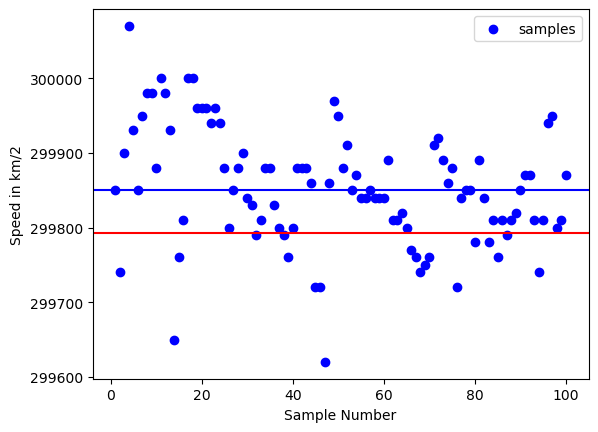

In [22]:
# your code here
sampleNumber = np.arange(1, 101)
speedData = speed + 299000
plt.scatter(sampleNumber, speedData, color='blue', label='samples')
plt.xlabel("Sample Number")
plt.ylabel("Speed in km/2")

plt.axhline(np.median(speedData), c='blue')
plt.axhline(sol, c="red")
plt.legend()
plt.show()

## Problem 3b - Checking for experimental error [ 10 pt ]

Looking at the data in the prior plot, it's clear that there are some patterns in the data relative to the overall mean. This might indicate some systematic experimental error. For example, if the first set of measurements is significantly larger than the later set, it may indicate that the experimenter has some initial problems with their equipment. Likewise, if there's a pattern within an experiment, it may indicate that something moves or changes during the course of the experiment (*e.g.* perhaps the day gets warmer, increasing the length of the measuring tape).

In an effort to see such patterns, produce a plot like the following
![Deviation from group mean by experiment](sol-by-expt.png)

In this plot, the data is broken down into different experiments. The deviation of each sample from the sample mean of that experiment is ploted *vs* the sample number. The first sample is plotted in blue and the remaining samples are in order of the [standard matplotlib colors](https://matplotlib.org/2.0.2/api/colors_api.html). The figure should have X and Y axis labels and a legend as shown.

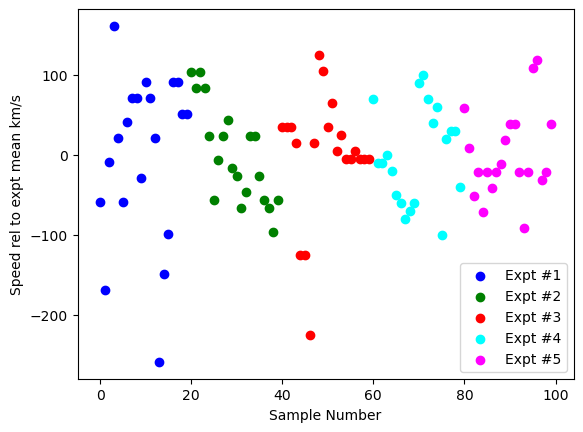

In [23]:
# your code here
fig, axes = plt.subplots()
colors=['blue', 'green', 'red', 'cyan', 'magenta']
for i in range(5):
    axes.scatter(np.arange((i * 20),((i+1) * 20)), speedData[(i * 20): ((i+1) * 20)] - speedData[(i * 20): ((i+1) * 20)].mean(), c = colors[i], label=f'Expt #{i + 1}')
plt.legend()
plt.xlabel('Sample Number')
plt.ylabel('Speed rel to expt mean km/s')

plt.show()

## Problem 3c - Refining the Visual Data Analysis [ 10 pt ]

Although the previous diagram indicated some trends in the deviation of the errors, it's still not convincing -- there's too much detail and it's hard to see the variation from experiment to experiment.

Realizing that *less is more*, let's prepare a graph showing the overall data in a single box plot and the per-experiment data in a grouped set of boxplots. Your plot should look something like the following:

![Side by side boxplots](sol-side-by-side.png)

The plots should share a common Y axis. In the left plot, the tick marks should be omitted because a single boxplot containing all data is being shown. Draw a horizontal red line indicating the currently accepted speed of light. In the right, individual experiments should be shown with tick marks indicating the experiment number.

You don't have to include the annotated text in the left plot indicating the current speed of light [but it's easy to do](https://matplotlib.org/users/pyplot_tutorial.html#annotating-text).

This presentation of the data indicates that there was significant variation in the first run of the experiment.

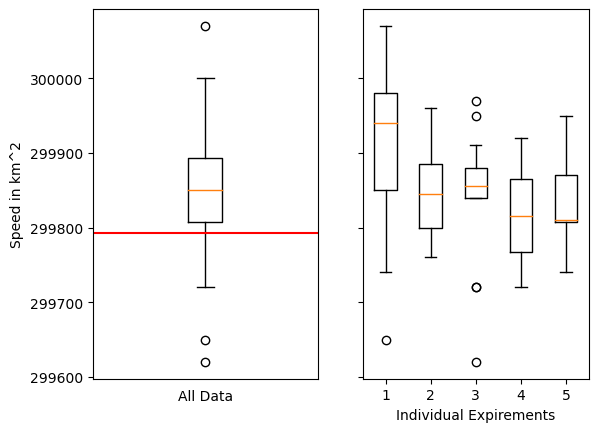

In [24]:
fig, ax = plt.subplots(nrows=1, ncols =2, sharey=True)
ax[0].boxplot(speedData)
ax[0].set_ylabel('Speed in km^2')
ax[0].set_xlabel('All Data')
ax[0].axhline(sol, c='red')
ax[0].set_xticks([])
ax[1].boxplot([speedData[(i * 20): ((i+1) * 20)] for i in range(5)]);
ax[1].set_xlabel('Individual Expirements');

# Problem 4 - Evidence for Money Ball

In the book [MoneyBall](https://en.wikipedia.org/wiki/Moneyball), Michael Lewis documented the introduction of statistics and data science in selecting players for the Oakland A's. in this problem, we're going to use [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) which contains the "complete batting and pitching statistics from 1871 to 2013, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. For more details, please [read the documentation](http://seanlahman.com/files/database/readme2012.txt)."

We're going to use two data sets, `Teams.csv` and `Salaries.csv`. These datasets should be provided in the zip file for this homework. Both files include columns `yearID` and `teamID`. The `teamID` field is a categorical field indicating the team names. The `yearID` field is a numeric field indicating the year for the data in that row. The `Teams.csv` file also contains a field `W`, which indicates the total *wins* for that team in that year. The `Salaries.csv` file contains the salary of individual players. Each player is listed on a distinct line.

## Problem 4a - Checking the number of wins in 1998

Read in the `Teams.csv` data and extract number of wins per team for 1998. You should set variable `w1998` to be a `pd.Series` with indicies of the team names and value of the total number of wins. The team names in the index should be sorted alphabetically from ANA to TOR. 

There are two ways to approach this - in the first, you can use `groupby` to group the salary data by year and team, aggregate the data (even though there's a single value of W for each year) and extract the data for the specific year using the [selection by label function `loc`](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-label).

A second way to do this is to use [boolean indexing](https://pandas.pydata.org/pandas-docs/stable/indexing.html#boolean-indexing) to extract the appropriate values from the W column; however, that data will be indexed with the row number from the CSV file and you'll need to take additional steps to create an index as described above (and tested for below)

Once you have that data, I've included the line to produce a bar plot showing the wins.

In [25]:
# your code here
df = pd.read_csv('./Teams.csv')

In [26]:
df1998 = df[df.yearID == 1998][['teamID','W']]
w1998 = pd.Series(list(df1998.W), index=list(df1998.teamID))


In [27]:
assert w1998.shape == (30,)
assert w1998['ANA'] == 85
assert w1998['TOR'] == 88
assert w1998.sum() == 2430

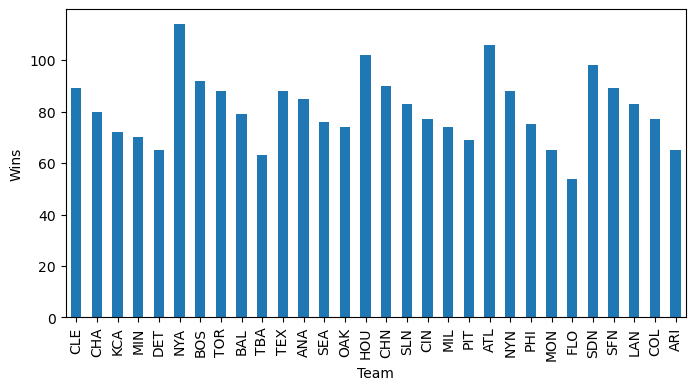

In [28]:
w1998.plot(kind='bar', figsize=(8,4)).set(ylabel='Wins', xlabel = 'Team');

## Problem 4b - Examining mean salary over time [10 pts]

Read in the salary data and produce a stacked barplot of the average salary per team for the years 1990 to 2010. The resulting figure should look something like the following:

![Salary stacked bar plot](bball-salary-stacked.png)

Doing this is an exercise in manipulating Pandas data frames because the plotting code is one line that I provide. 

To plot a stacked bar plot, you need data in a form such as:

```
       a    b
one  1.0  2.0
two  3.0  4.0
```

where the columns are the elements to be stacked -- *i.e.* we'll have bars labeled 'one' and 'two' each containing data corresponding to 'a' and 'b'. In our example, the column labels will need to be the team names and the rows will be the years.

There's an easy way to transform data that looks like:
```
one  a    1.0
     b    2.0
two  a    3.0
     b    4.0
```
into the column-labeled varity by using [`unstack()` to change a level of index to column labels](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html).

You need to provide a single Pandas dataframe `sals` that contains the mean salary data. Each row contains the data for a single year and each column is a team name. Your data frame should look something like this..
```
teamID	ANA	ARI	ATL	BAL	BOS	...
yearID																					
1990	0.000000e+00	0.000000e+00	4.548594e+05	...
1991	0.000000e+00	0.000000e+00	7.361400e+05
```
 This is easiest to do using `groupby` to gather the data by year and team and then transform that using unstack. The [documentation on groupby](https://pandas.pydata.org/pandas-docs/stable/groupby.html) shows how to group with multiple columns (year, team). You may also need to clean up the data if there are NaN values (perhaps because a team didn't exist in a given year) because those won't plot correctly.
 
 Approach this in steps -- this is literally a single line of Pandas code once you've read in the salary data.

one  a    1.0
     b    2.0
two  a    3.0
     b    4.0
dtype: float64
Unstacked by one level, the dataframe is
       a    b
one  1.0  2.0
two  3.0  4.0


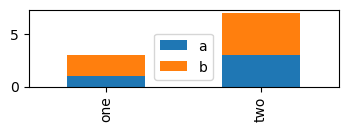

In [29]:
#
# Example showing unstack()
#
ex_i = pd.MultiIndex.from_tuples([('one', 'a'), ('one', 'b'), ('two', 'a'), ('two', 'b')])
ex_s = pd.Series(np.arange(1.0, 5.0), index=ex_i)
print(ex_s)
print('Unstacked by one level, the dataframe is')
print(ex_s.unstack())
ex_s.unstack().plot(kind='bar', stacked=True, figsize=(4,1));

In [30]:
df = pd.read_csv('./Salaries.csv')

In [31]:
# your code here
sals = df[(df.yearID >= 1990) & (df.yearID <= 2010)].groupby(['yearID','teamID']).salary.mean()

In [32]:
sals = sals.unstack()

In [33]:
sals.fillna(0,inplace=True)

In [34]:
assert sals.shape == (21,34)

In [35]:
#
# Check column names
#
assert sals.columns[0] == 'ANA'
assert sals.columns[33] == 'WAS'

In [36]:
#
# Check that specific values are close to the right values
#
assert abs(sals.values[0][3] - 261623) < 1
assert sals.values[20][5] == 0

In [37]:
#
# Check broader set of values
#
assert (sals.values[20].sum() - 99146628 ) < 1
assert (sals['OAK'].sum() - 30171483) < 1

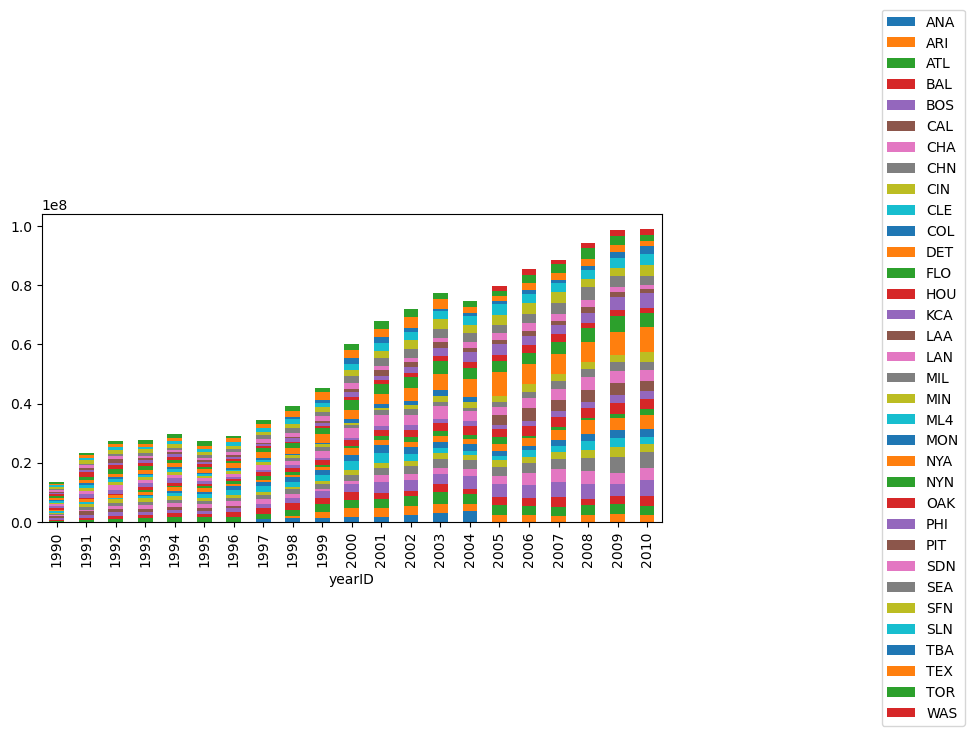

In [38]:
#
# Plot your solution assuming it passes the tests
#
sals.plot(kind='bar', stacked=True, legend = False, figsize=(8,4))
plt.legend(loc='right', bbox_to_anchor=(1.5, 0.5));

## Problem 4c - What's up with Oakland? [ 10pts ]

In this problem, you're going to produce three scatter plots using the `Teams.csv` and `Salaries.csv` data to confirm the intuition that the data science approach that Oakland adopted changed their effiency (wins per dollar spent).

To do this, you're going to produce a [scatter plot](http://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-plot) of the paytaoll (y-axis) *vs* the number of Wins (x-axis) for the years 1998, 2003 and 2013. The payroll is the total salary of the team.

The plot for 1998 should look like ![this scatter plot](bball-scatter-1998.png)

In this example, each dot represents the wins *vs* payroll for the different teams. The red dot indicates the data for Oakland.

Again, this problem is best tackled using `groupby`. It's also useful to create a new DataFrame merging only the needed data from `Teams` and `Salaries` for a specific year. You may also want to review accessing specific values using `loc` in order to pull out the data for Oakland (OAK). You should produce 3 plots, one each for 1998, 2003 and 2013. From the plots, you'll see that Oakland moves from being a cheap losing team to a cheap winning team. 

In [39]:
# your code here
sals = pd.read_csv('./Salaries.csv')
teams = pd.read_csv('./Teams.csv')

In [40]:
sals = sals[(sals.yearID == 1998) | (sals.yearID == 2003) | (sals.yearID == 2013)].groupby(['yearID','teamID']).salary.sum()

In [41]:
teams = teams[(teams.yearID == 1998) | (teams.yearID == 2003) | (teams.yearID == 2013)][['yearID','teamID', 'W']]

In [42]:
mergedDF = teams.merge(sals, on=['yearID','teamID'])

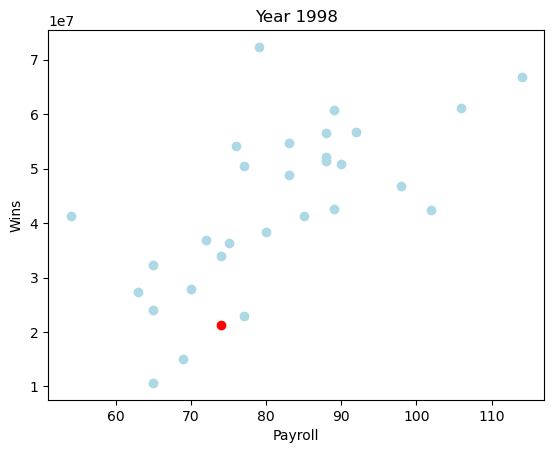

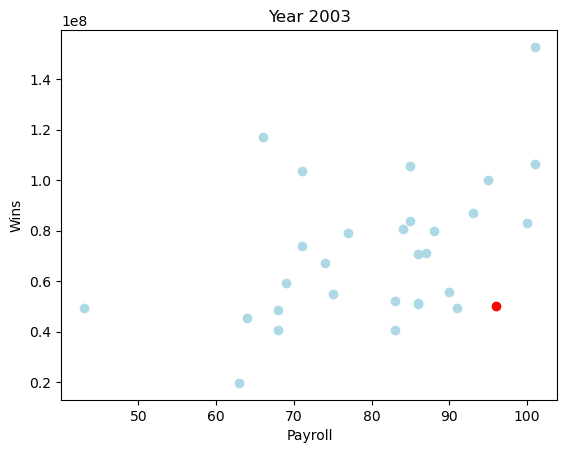

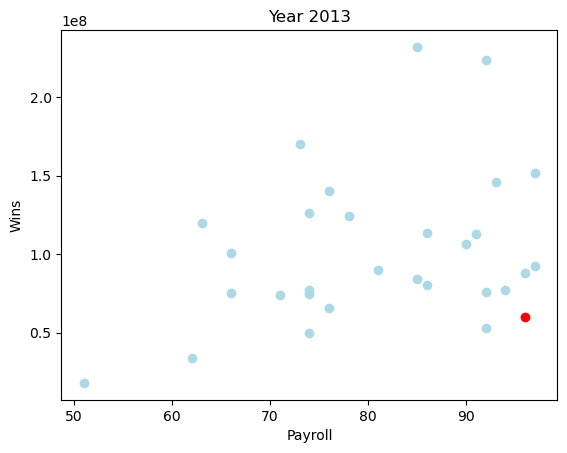

In [43]:
years = [1998, 2003, 2013]
for year in years:
    X = mergedDF[(mergedDF['yearID'] == year) & (mergedDF['teamID'] != 'OAK')]
    Xsub = mergedDF[(mergedDF['yearID'] == year) & (mergedDF['teamID'] == 'OAK')]
    fig, ax = plt.subplots()
    ax.scatter(X['W'], X['salary'], c='lightblue')
    ax.scatter(Xsub['W'], Xsub['salary'], c='red')
    ax.set_xlabel('Payroll')
    ax.set_ylabel('Wins')
    ax.set_title(f'Year {year}')
                    #mergedDF[(mergedDF['yearID'] == year)].axes(x='W', y='salary',kind="scatter", title=f'Year {year}', xlabel='Wins', ylabel='Payroll', subplots=True)